## Ejercicio Semanal - Tipos de Clientes

Te encargarás de categorizar a algunos de tus clientes en base a datos históricos. No hay noción de qué tipo de clientes hay. ¡Se le pide que lo averigüe!

* cargar datos / customers.csv
* recuerde que la transformación y la normalización pueden ayudar.
* ¿Hay valores atípicos?
* considere usar PCA para reducir las dimensiones
* Utilice k-means para crear los grupos que le resulten más útiles.
* Utilice visualizaciones para describir sus grupos.

Cuales grupos hizo y porque? Esto lo discutimos en clase!

### Atributos:

- FRESH: gasto anual (m.u.) en productos frescos (Continuo);
- LECHE: gasto anual (m.u.) en productos lácteos (Continuo);
- ALIMENTOS: gasto anual (m.u.) en productos alimenticios (Continuo);
- CONGELADOS: gasto anual (m.u.) en productos congelados (Continuo)
- DETERGENTS_PAPER: gasto anual (m.u.) en detergentes y productos de papel (Continuo)
- DELICATESSEN: gasto anual (m.u.) en productos delicatessen (Continuo);
- CANAL: Canal de clientes - Horeca (Hotel / Restaurante / Cafetería) o Canal Minorista (Nominal)
- REGIÓN: clientes Región Lisnon, Oporto u Otro (Nominal)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 9)
# plt.style.use('ggplot')

In [2]:
data = pd.read_csv("data/customers.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
print(data.info())

print('\n',data.groupby('Channel').size())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB
None

 Channel
1    298
2    142
dtype: int64


## Visualización de Datos

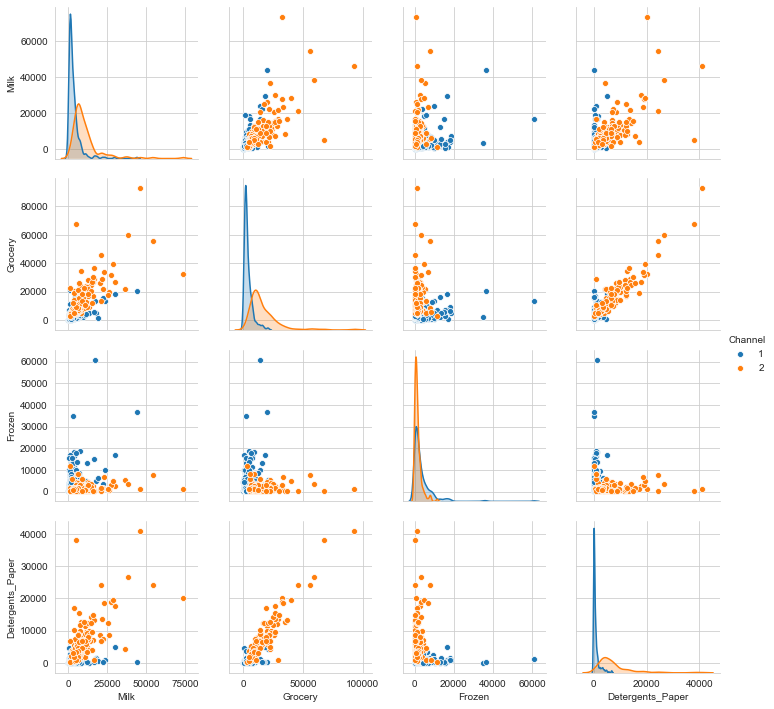

In [4]:
def plot_data_hist(data):
    sns.pairplot(data, hue='Channel', vars=['Milk', 'Grocery', 'Frozen', 'Detergents_Paper'])
    
plot_data_hist(data)

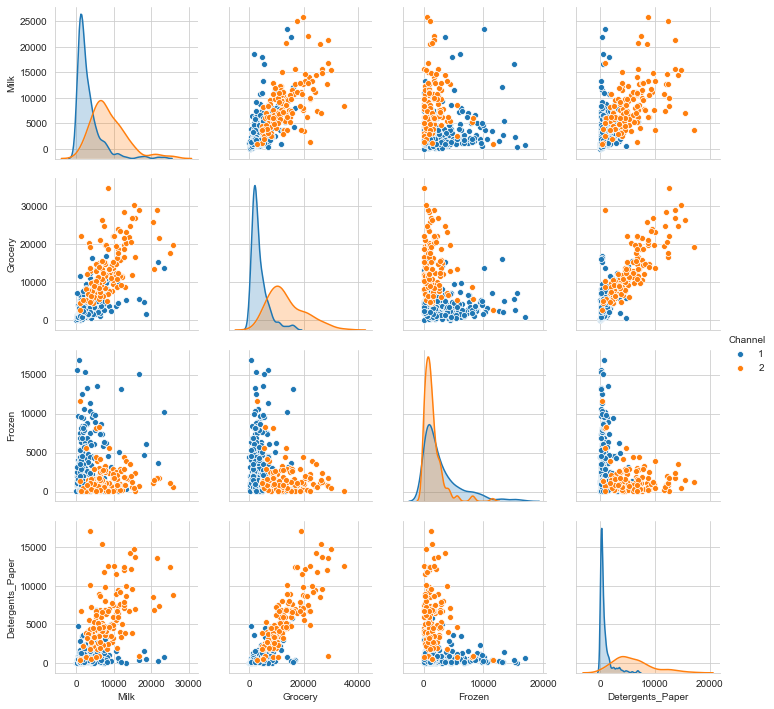

In [5]:
from scipy import stats

def remove_outliers(df_input):
    df = df_input.copy()
    return df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

data = remove_outliers(data)
plot_data_hist(data)

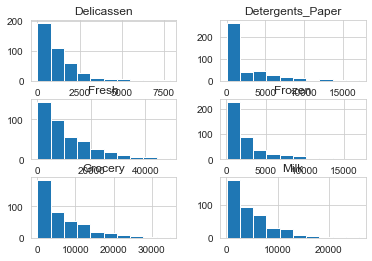

In [6]:
data.drop(['Channel', 'Region'], 1).hist()
plt.show()

/Users/aarongomez/opt/anaconda3/lib/python3.7/site-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/Users/aarongomez/opt/anaconda3/lib/python3.7/site-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


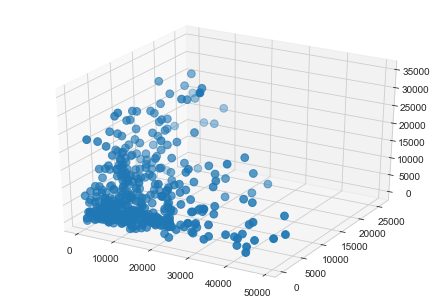

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(
    data["Fresh"].values, 
    data["Milk"].values, 
    data['Grocery'].values, 
    data['Frozen'].values, 
#     data['Detergents_Paper'].values, 
#     data['Delicassen'].values, 
    s=60
)

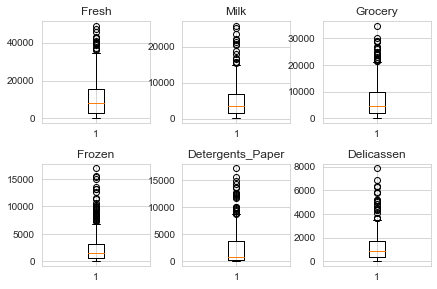

In [8]:
fig, axs = plt.subplots(2, 3)

axs[0, 0].boxplot(data.Fresh)
axs[0, 0].set_title('Fresh')

axs[0, 1].boxplot(data.Milk)
axs[0, 1].set_title('Milk')

axs[0, 2].boxplot(data.Grocery)
axs[0, 2].set_title('Grocery')

axs[1, 0].boxplot(data.Frozen)
axs[1, 0].set_title('Frozen')

axs[1, 1].boxplot(data.Detergents_Paper)
axs[1, 1].set_title('Detergents_Paper')

axs[1, 2].boxplot(data.Delicassen)
axs[1, 2].set_title('Delicassen')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

plt.show()

## Data Wrangling

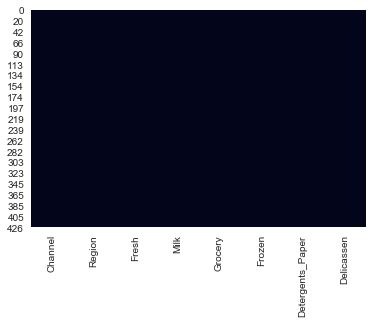

In [9]:
# data
sns.heatmap(data.isnull(), cbar=False)

In [10]:
from sklearn.preprocessing import RobustScaler

def robustScaler(feature_values):
    values = feature_values.values.reshape(-1, 1)
    return RobustScaler().fit(values).transform(values)

def scale_features(df):
    df.Fresh = robustScaler(df.Fresh)
    df.Milk = robustScaler(df.Milk)
    df.Grocery = robustScaler(df.Grocery)
    df.Frozen = robustScaler(df.Frozen)
    df.Detergents_Paper = robustScaler(df.Detergents_Paper)
    df.Delicassen = robustScaler(df.Delicassen)
    
    return df

df = data.copy()
df = scale_features(df)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.367563,1.128021,0.396665,-0.487834,0.558140,0.355158
1,2,3,-0.078055,1.156378,0.659147,0.124629,0.739784,0.695551
2,2,3,-0.133955,0.971873,0.412751,0.379031,0.805223,5.411308
3,1,3,0.414888,-0.429775,-0.040150,1.961227,-0.077764,0.704877
4,2,3,1.157320,0.346177,0.349191,0.976459,0.294916,3.344861


In [11]:
# One hot encode
from sklearn.preprocessing import OneHotEncoder

def add_dummies(df):
    df_c = df.copy()
    df_c = df_c.join(pd.get_dummies(df_c.Channel, prefix="Channel"))
    df_c = df_c.join(pd.get_dummies(df_c.Region, prefix="Region"))
    df_c = df_c.drop(['Channel', 'Region'], axis='columns')
    
    return df_c
    
df_1 = add_dummies(df)
df_1

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,0.367563,1.128021,0.396665,-0.487834,0.558140,0.355158,0,1,0,0,1
1,-0.078055,1.156378,0.659147,0.124629,0.739784,0.695551,0,1,0,0,1
2,-0.133955,0.971873,0.412751,0.379031,0.805223,5.411308,0,1,0,0,1
3,0.414888,-0.429775,-0.040150,1.961227,-0.077764,0.704877,1,0,0,0,1
4,1.157320,0.346177,0.349191,0.976459,0.294916,3.344861,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
435,1.720139,1.569028,1.503874,4.624332,-0.173135,1.028172,1,0,0,0,1
436,2.476467,-0.386503,-0.492267,1.211869,-0.199252,1.138527,1,0,0,0,1
437,0.515414,2.201906,3.363086,-0.399604,4.128531,0.766272,0,1,0,0,1
438,0.178660,-0.285228,-0.300278,-0.161820,-0.177243,0.966777,1,0,0,0,1


### Features variable

In [12]:
X = df_1.copy()

## Build the Model

In [13]:
from sklearn.cluster import KMeans

### Find the best number of clusters


[2482.7499948469963, 1747.7138124729106, 1375.0242014572705, 1213.301801625862, 1087.212751469237, 979.856278568428, 920.4069980074368, 865.1080575400874, 810.5559266438163, 786.3680488609857, 753.127135119975, 728.306574054137, 701.0405881236459, 677.2919079610651]


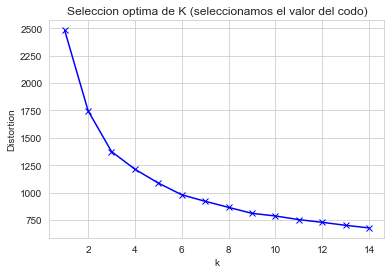

In [14]:
def find_distortions(X):
    distortions = []
    clusters = range(1,15)
    for k in clusters:
        model = KMeans(n_clusters=k)
        model.fit(X)
        distortions.append(model.inertia_)
    
    print(distortions)
    return clusters, distortions
    
def plot_best_K(clusters, distortions):
    plt.plot(clusters, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Seleccion optima de K (seleccionamos el valor del codo)')
    plt.show()
    
def find_best_k(X):
    clusters, distortions = find_distortions(X)
    plot_best_K(clusters, distortions)
    
find_best_k(X)

### 5 
seems to be a good number of clusters

In [15]:
k = 5

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
y = kmeans.predict(X)
centroids = kmeans.cluster_centers_
centroids

array([[-4.10629371e-02,  6.52714132e-01,  8.59247700e-01,
        -1.25006744e-01,  1.18320539e+00,  2.82141406e-01,
         1.02272727e-01,  8.97727273e-01,  1.13636364e-01,
         1.02272727e-01,  7.84090909e-01],
       [ 6.99985493e-01,  7.49400671e-02, -5.84474541e-02,
         2.92601385e+00, -4.95476939e-02,  3.25327674e-01,
         9.23076923e-01,  7.69230769e-02,  1.92307692e-01,
         1.15384615e-01,  6.92307692e-01],
       [ 1.65980246e-01, -2.24661130e-01, -2.01591835e-01,
         1.06084056e-01, -3.65487549e-02, -1.21849012e-01,
         9.85294118e-01,  1.47058824e-02,  1.96078431e-01,
         1.07843137e-01,  6.96078431e-01],
       [-2.12118823e-01,  1.84723236e+00,  2.32369742e+00,
         3.25561679e-02,  2.70739176e+00,  5.80088262e-01,
        -3.33066907e-16,  1.00000000e+00,  1.42857143e-01,
         2.00000000e-01,  6.57142857e-01],
       [ 8.17382772e-01,  6.32572454e-01,  3.14193232e-01,
         4.77716547e-01,  1.62897597e-01,  2.21859058e+00,
  

In [17]:
y

array([0, 0, 4, 1, 4, 0, 0, 0, 2, 3, 0, 2, 4, 0, 0, 2, 0, 4, 4, 2, 0, 2,
       1, 4, 0, 2, 2, 3, 2, 4, 2, 2, 1, 2, 0, 4, 0, 3, 4, 4, 0, 3, 0, 3,
       3, 0, 3, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 3, 2, 2, 0, 4, 2, 1, 1,
       1, 0, 2, 1, 3, 2, 2, 2, 0, 0, 2, 0, 1, 4, 2, 1, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 0, 3, 0, 3, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       0, 1, 1, 4, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 1, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 0, 0, 0, 2, 2, 3, 0, 3, 0, 2,
       2, 2, 0, 3, 2, 3, 2, 0, 1, 4, 2, 2, 4, 0, 2, 2, 2, 1, 0, 0, 1, 2,
       2, 0, 2, 1, 0, 2, 2, 3, 3, 4, 2, 2, 3, 2, 0, 2, 3, 2, 2, 2, 0, 0,
       2, 4, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 4, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 4, 4, 2, 2, 2, 2, 1, 2, 2,
       0, 1, 3, 4, 0, 2, 2, 2, 2, 1, 2, 2, 4, 1, 1, 0, 2, 0, 1, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 3, 0, 0, 3, 0, 3, 2, 2,
       3, 1, 2, 3, 2, 2, 0, 2, 2, 2, 3, 2, 2, 2, 2,

### Plot the results - PCA

In [18]:
from sklearn.decomposition import PCA

def apply_pca(df):
    X = df.copy()
    pca = PCA(n_components = 2)
    pca.fit(X)

    X_pca = pca.transform(X)
    
    return X_pca

X_pca = apply_pca(X)
X_pca.shape

# pca.explained_variance_ratio_
# pca.singular_values_

(414, 2)

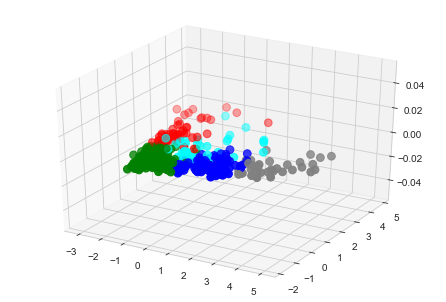

In [19]:
def plot_clusters(X, y):
    fig = plt.figure()
    ax = Axes3D(fig)
    colores=['blue','red','green','gray','cyan']
    categorias=[]

    for item in y:
        categorias.append(colores[item])

    ax.scatter(X[:, 0], X[:, 1], c=categorias,s=60)
    
plot_clusters(X_pca, y)

### con 5 categorias se ve todo muy agrupado, se procede a seleccionar 4 categorias

## Build Model - PCA de primero con 4 clusters

4 Centroides

In [20]:
X_2 = X.copy()
X_2 = apply_pca(X_2)
X_2.shape

(414, 2)

In [21]:
kmeans_2 = KMeans(n_clusters=4, random_state=42)
kmeans_2.fit(X_2)
y_2 = kmeans_2.predict(X_2)
print('y_2', y_2)
kmeans_2.cluster_centers_

y_2 [1 1 3 2 2 1 1 1 0 3 1 0 1 1 1 0 1 1 1 0 1 0 2 3 1 0 0 3 0 1 0 0 2 0 1 2 1
 3 2 0 1 3 1 3 3 1 3 0 0 0 1 0 0 1 0 1 1 1 3 0 0 1 2 0 2 2 2 1 0 2 3 0 0 0
 1 1 0 1 2 2 0 2 1 0 1 0 0 0 3 3 1 0 0 1 3 1 3 0 3 2 0 0 0 0 0 2 0 0 0 0 1
 2 2 1 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 2 0 3 0 0 0 0 0 0 0 0 0 3 1 0 1 1 1 0
 0 3 1 3 1 0 0 0 1 3 0 3 0 1 2 0 0 0 1 1 0 0 0 0 1 1 2 0 0 1 0 2 1 0 0 3 3
 2 0 0 3 0 1 0 3 0 0 1 1 1 0 3 0 0 1 2 0 0 0 1 0 0 2 2 0 0 0 2 0 0 0 0 2 2
 0 0 0 1 3 0 0 0 2 0 2 1 2 0 0 0 0 2 0 0 1 2 3 2 1 0 0 0 0 2 0 0 2 2 2 1 0
 1 2 2 0 0 2 0 0 0 0 0 1 0 0 0 1 1 0 1 3 1 1 3 1 3 0 0 3 2 0 3 0 0 3 0 0 0
 3 0 0 0 0 0 0 0 2 0 0 3 0 2 1 0 2 2 2 1 1 1 3 0 0 1 1 0 3 0 3 0 3 2 0 0 1
 2 0 0 0 0 0 0 1 0 0 0 0 0 2 0 1 0 0 1 0 0 1 0 2 2 0 3 0 0 0 0 0 0 0 0 2 0
 0 1 2 0 0 0 2 0 0 0 0 2 3 1 2 0 0 1 0 1 1 1 1 0 1 1 0 0 1 2 1 2 0 0 1 2 0
 0 0 2 2 3 0 0]


array([[-0.81393452, -0.63777358],
       [ 1.20942976, -0.24802367],
       [-1.2962055 ,  1.99516973],
       [ 3.22329257,  0.70071274]])

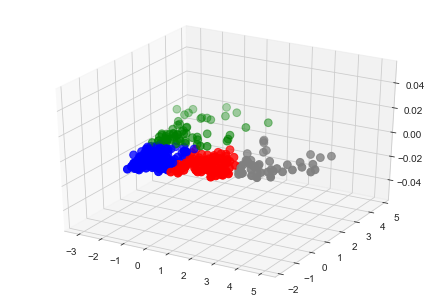

In [22]:
plot_clusters(X_2, y_2)

#### Se aprecian mejor los grupos con 4 centroides

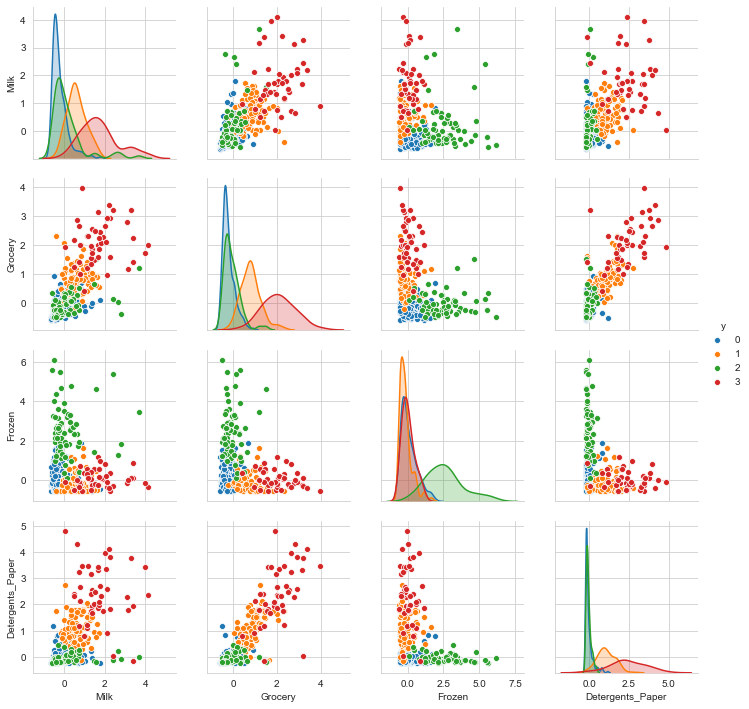

In [30]:
data_3 = X.copy()

data_3['y'] = y_2

data_3

sns.pairplot(data_3, hue='y', vars=['Milk', 'Grocery', 'Frozen', 'Detergents_Paper'])

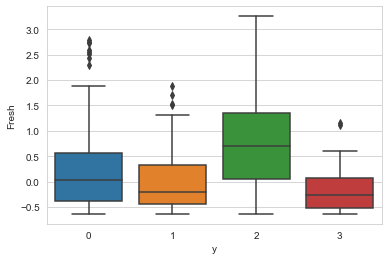

In [36]:
sns.boxplot(y='Fresh', x="y", data=data_3)

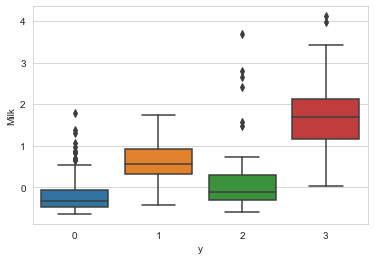

In [37]:
sns.boxplot(y='Milk', x="y", data=data_3)

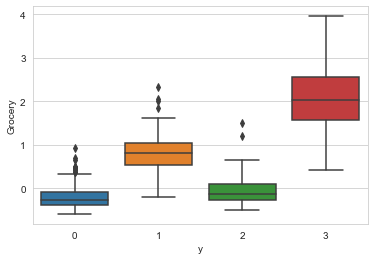

In [38]:
sns.boxplot(y='Grocery', x="y", data=data_3)

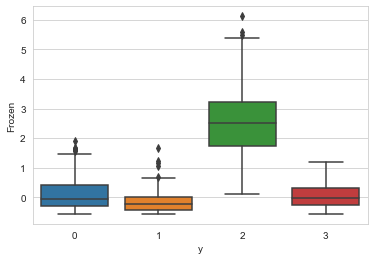

In [39]:
sns.boxplot(y='Frozen', x="y", data=data_3)

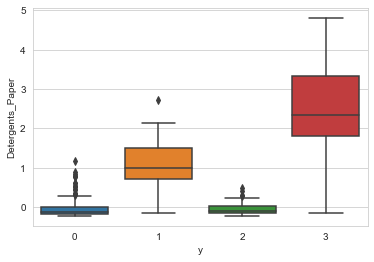

In [40]:
sns.boxplot(y='Detergents_Paper', x="y", data=data_3)

### Resultados

Grupos
- 0 Al parecer son los que compran menos.
- 1 Gasto medio en Milk, Grosery y Detergents Paper
- 2 Productos frescos y congelados, pueden ser un restaurante.
- 3 Lo grueso es Detergents Pape, Milk y Grosery, puede ser un hotel.